<a href="https://colab.research.google.com/github/brdacunha/BCC---Projeto-Final/blob/main/Projeto_Final_BCC_Bruno_e_Andr%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto Final - Bases Computacionais da Ciência - Em processo...

Alunos: Bruno Rodrigues da Cunha e Andre dos Santos Souza

Universidade Federal do ABC, Brasil

##ANOVA (Análise de Variância)

Análise de variância é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente$^3$.

A ANOVA clássica é muito poderosa quando os grupos são normalmente distribuídos e têm variâncias iguais. No entanto, quando os grupos têm variâncias desiguais, é melhor usar o [Welch ANOVA$^4$](https://pingouin-stats.org/generated/pingouin.welch_anova.html#pingouin.welch_anova):
    
    pingouin.welch_anova

O **Pingouin** é um pacote estatístico de código aberto escrito em **Python 3**, projetado para usuários que desejam funções estatísticas simples, mas exaustivas, e baseado principalmente em **Pandas** e **NumPy**. Algumas de suas principais características estão listadas abaixo.(Para obter uma lista completa das funções disponíveis, consulte o [API documentation](https://pingouin-stats.org/api.html).)$^1$

1 - ANOVAs: N-ways, repeated measures, mixed, ancova

2 - Pairwise post-hocs tests (parametric and non-parametric) and pairwise correlations

3 - Robust, partial, distance and repeated measures correlations

4 - Linear/logistic regression and mediation analysis

5 - Bayes Factors

6 - Multivariate tests

7 - Reliability and consistency

8 - Effect sizes and power analysis

9 - Parametric/bootstrapped confidence intervals around an effect size or a correlation coefficient

10 - Circular statistics

11 - Chi-squared tests

12 - Plotting: Bland-Altman plot, Q-Q plot, paired plot, robust correlation…

##Iniciando...

Antes de começar a usar o **Pingouin no Google Colab**, é necessário [instalar](https://stackoverflow.com/questions/71425639/package-pingouin-in-colab) a biblioteca$^6$. Isso pode ser feito com o seguinte comando:

    **!pip install pingouin**

Observação: para saber como instalar bibliotecas$^5$ que não estão no **Google Colab** por padrão, clique [aqui](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb).

Ao final da instalação, deve aparecer a seguinte mensagem:

    "Successfully installed littleutils-0.2.2 outdated-0.2.2 pandas-flavor-0.2.0 pingouin-0.5.2 statsmodels-0.13.5"
...ou versão mais recente.

In [ ]:
!pip install pingouin

##Trabalhando com o Pingouin

O **Pingouin** trabalha muito bem com o **Pandas**. Para proceder ao teste [ANOVA](https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova), é preciso criar um *Dataframe*. Isso pode ser feito, por exemplo, com o seguinte comando:

In [38]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BCC---Projeto-Final/main/Projeto%20Final_Tecido_para_ANOVA.csv')
df.head(15)

,Grupos,Valores de Cinza
0,Controle,181.53
1,Controle,181.87
2,Controle,177.88
3,Controle,179.60
4,Controle,177.06
5,Controle,180.12
6,Controle,175.30
7,Controle,182.15
8,Controle,186.78
9,Controle,178.25


A tabela acima contém os dados de leitura de Valores de Cinza (luminância de pixel), capturados pelo [Software ImageJ](https://imagej.nih.gov/ij/download.html), para cada grupo experimental de um determinado tecido de algodão, após exposição a diferentes produtos comumente utilizados na lavagem de roupas (Grupos: controle, sabão em pó, sabão em barra e cândida), que serão utilizados para o presente teste. 

**Homoscedasticidade**

Em ANOVA, há um pressuposto que deve ser atendido que é de os erros terem *variância comum*, ou seja, [homocedasticidade](https://biostatistics-uem.github.io/Bio/aula8/teste_normalidade_homocedasticidade.html). Isso implica que cada fator comparado pelo teste F deve ter, aproximadamente, a mesma variância para que a ANOVA tenha validade. Quando este pressuposto não é atendido dizemos que as variâncias não são homogêneas$^9$.

A homogeneidade das variâncias pode ser medida com a seguinte [função](https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity):

    pingouin.homoscedasticity()

**Parâmetros:**

**- data**: *Dataframe, list or dict*

É o *Dataframe* do Pandas (neste caso, a variável 'df' acima).

**- dv**: *str*

Nome da coluna dos dados que contém a variável dependente. O nome da coluna deve estar entre aspas (simples ou dupla).

**group**: *str*

Grouping variable (only when data is a long-format dataframe).

**method**: *str*

É o teste estatístico: *'levene'* (padrão) executa o teste de Levene usando scipy.stats.levene() e *'bartlett'* executa o teste de Bartlett usando scipy.stats.bartlett(). 

**alpha**: *float*

Nível de significância.

**kwargs**: Argumento(s) opcional(is)

*(lower-level scipy.stats.levene() function.)*


In [47]:
pg.homoscedasticity(df, dv = 'Valores de Cinza', group= 'Grupos', method = 'levene')

,W,pval,equal_var
levene,2.383622,0.082115,True


Como resultado, o teste retorna os seguintes dados:

**stats**: pandas.DataFrame

**'W/T'**: Teste estatístico (‘W’ para *Levene*, ‘T’ para *Bartlett*)

**'pval'**: valor p

**'equal_var'**: *True* se os dados apresentam variâncias iguais.

***One-way ANOVA e N-way ANOVA:***
    
    aov = pg.anova(data = None, dv = None, between = None, ss_type = 2, detailed = Boolean, effsize = 'np2')

Parâmetros:

**- data**: *DataFrame*

É o *DataFrame* do Pandas (neste caso, a variável 'df' acima).

**- dv**: *string*

Nome da coluna dos dados que contém a variável dependente. O nome da coluna deve estar entre aspas (simples ou dupla).

**- between**: *string* ou a lista com N elementos

Nome da(s) coluna(s) dos dados que contêm o(s) fator(es). Se *between* for uma única *string*, uma ANOVA unidirecional será calculada. Se *between* for uma lista com dois ou mais elementos, uma ANOVA N-way é executada. Observe que o Pingouin chamará internamente modelos estatíticos para calcular ANOVA com 3 ou mais fatores ou ANOVA bidirecional não balanceada. O nome da coluna deve estar entre aspas (simples ou dupla).

**- ss_type**: *int*

Especificar como a soma dos quadrados (*SS - Sum of Squares)* é calculada para experimento desbalanceado com 2 ou mais fatores. Pode ser 1, **2 (padrão)** ou 3. Isso não tem impacto no One-way ou N-way ANOVA com dados balanceados.

**- detailed**: *boolean*

Se *True*, retorna uma tabela detalhada (o padrão é *True* para N-way ANOVA).

**- effsize**: *str*

Abreviação de *Effect size*. Deve ser 'np2' (eta ao quadrado parcial) ou 'n2' (eta ao quadrado). São iguais para One-way ANOVA.

In [46]:
import pingouin as pg

aov = pg.anova(data = df, dv = 'Valores de Cinza', between = 'Grupos', detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Grupos,2197.635742,3,732.545247,84.705818,2.614233e-18,0.852407
1,Within,380.516850,44,8.648110,NaN,NaN,NaN


Como resultado do teste, o ANOVA retorna os seguintes dados:

**Source**: Nomes dos grupos (fatores).

**SS**: Somas dos quadrados *(Sums os Squares)*.

**DF**: Graus de liberdade *(Degrees of freedom)*.

**MS**: Quadrados médios *(Mean squares)*.

**F**: Valores de *F*.

**p-unc**: Valores de *p* não corrigidos *(uncorrected p-values)*

**np2**: *effect sizes*

##Teste Tukey

Tukey HSD é o melhor teste post-hoc para One-way ANOVA balanceada$^7$.

É um teste conservador para ANOVA com tamanhos de amostra desiguais, mas não é robusto se os grupos tiverem variâncias desiguais (ver [homoscedasticidade](https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity)).

In [45]:
pt = pg.pairwise_tukey(data = df, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen')
pt.round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,Candida,Controle,160.788,179.779,-18.991,1.201,-15.818,0.000,-6.458
1,Candida,Sabao em barra,160.788,168.682,-7.894,1.201,-6.575,0.000,-2.684
2,Candida,Sabao em po,160.788,168.538,-7.750,1.201,-6.455,0.000,-2.635
3,Controle,Sabao em barra,179.779,168.682,11.097,1.201,9.243,0.000,3.773
4,Controle,Sabao em po,179.779,168.538,11.241,1.201,9.363,0.000,3.822
5,Sabao em barra,Sabao em po,168.682,168.538,0.144,1.201,0.120,0.999,0.049


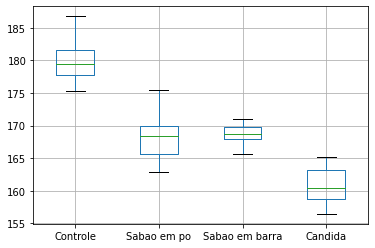

In [35]:
import matplotlib.pyplot as plt

tabela = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BCC---Projeto-Final/main/Projeto%20Final_Tecido_para_Gr%C3%A1fico.csv')
tabela

plt.figure()
tabela.boxplot(['Controle','Sabao em po','Sabao em barra','Candida'])

plt.show()

##Referências

1 - https://pingouin-stats.org/index.html

2 - https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova

3 - https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia

4 - https://pingouin-stats.org/generated/pingouin.welch_anova.html#pingouin.welch_anova

5 - https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb

6 - https://stackoverflow.com/questions/71425639/package-pingouin-in-colab

7 - https://pingouin-stats.org/generated/pingouin.pairwise_tukey.html#pingouin.pairwise_tukey

8 - https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity.

9 - https://biostatistics-uem.github.io/Bio/aula8/teste_normalidade_homocedasticidade.html

10 - https://imagej.nih.gov/ij/download.html

